# Historical Stock EDA and Dashboarding

This notebook contains the answers from the Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard.

# Environment and Libs

In [1]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
#!pip install plotly

!pip install html5lib
!pip install --upgrade nbformat

import yfinance as yf
import pandas as pd

import requests

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Function(s)

In [2]:
def make_graph(df_shares:pd.DataFrame,
               df_revenue:pd.DataFrame,
               titles:list[str],
               ylabels:list[str]) -> None:

    plt.figure()
    plt.plot(df_shares['Date'], df_shares['Close'])
    plt.title(titles[0])
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel(ylabels[0])
    plt.show()
    
    df_revenue_reversed = df_revenue[::-1]

    plt.figure()
    plt.plot(df_revenue_reversed['Date'][::10], df_revenue_reversed['Revenue'][::10])
    plt.title(titles[1])
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel(ylabels[1])
    plt.show()

## Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [3]:
tesla = yf.Ticker("TSLA")
print(tesla.info)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [4]:
data_tesla = tesla.history(period='max')\
                  .reset_index()

data_tesla.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

In [6]:
tables = soup.find_all("table")
titles = soup.find_all('title')

df_tesla_revenue=pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")

    df_tesla_revenue = df_tesla_revenue._append({"Date": date, "Revenue": revenue}, ignore_index=True)

df_tesla_revenue["Revenue"] = df_tesla_revenue['Revenue'].str.replace(',|\$',"")

df_tesla_revenue.dropna(inplace=True)

df_tesla_revenue = df_tesla_revenue[df_tesla_revenue['Revenue'] != ""]

df_tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [7]:
game = yf.Ticker("GME")
print(game.info)

{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and e-commerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, and gaming headsets; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts. The company operates stores and e-commerce s

In [8]:
data_game = game.history(period='max')\
                  .reset_index()

data_game.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

In [10]:
tables = soup.find_all("table")
titles = soup.find_all('title')

df_game_revenue=pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")

    df_game_revenue = df_game_revenue._append({"Date": date, "Revenue": revenue}, ignore_index=True)

df_game_revenue["Revenue"] = df_game_revenue['Revenue'].str.replace(',|\$',"")

df_game_revenue.dropna(inplace=True)

df_game_revenue = df_game_revenue[df_game_revenue['Revenue'] != ""]

df_game_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

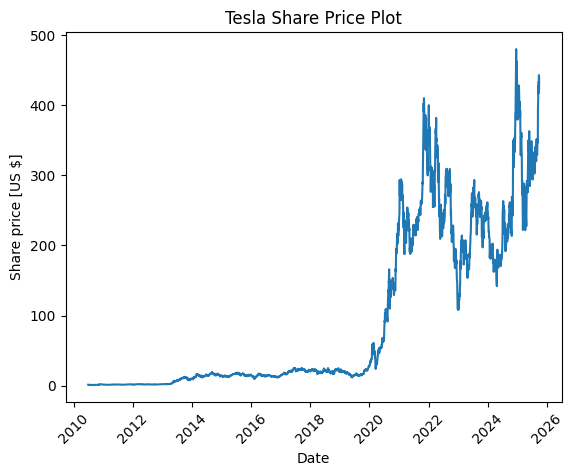

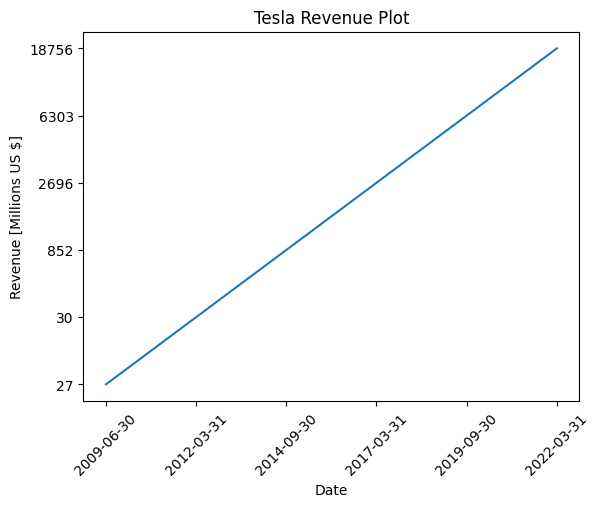

In [11]:
make_graph(df_shares=data_tesla,
            df_revenue=df_tesla_revenue,
            titles=['Tesla Share Price Plot', 'Tesla Revenue Plot'],
            ylabels=['Share price [US $]', 'Revenue [Millions US $]'])

## Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

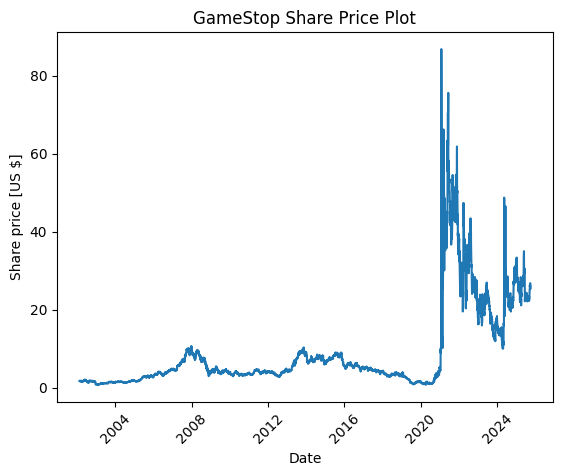

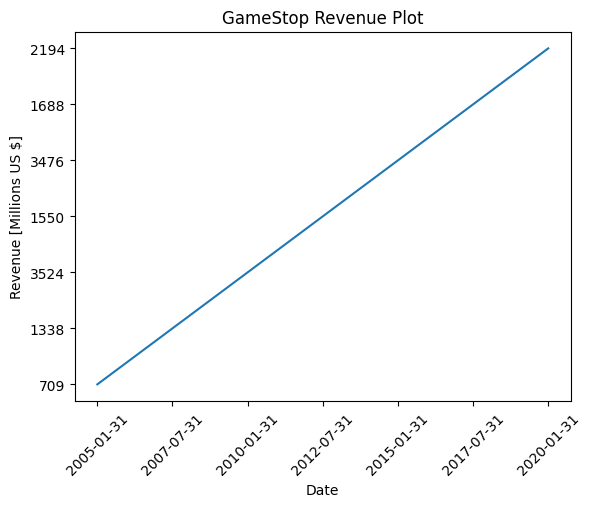

In [12]:
make_graph(df_shares=data_game,
           df_revenue=df_game_revenue,
           titles=['GameStop Share Price Plot', 'GameStop Revenue Plot'],
           ylabels=['Share price [US $]', 'Revenue [Millions US $]'])